In [1]:
import import_ipynb  
import utils         
import pandas as pd
import os

In [2]:
years = [2017,2018,2019,2020,2021,2022,2023,2024,2025]
philly_crime_all = utils.load_philly_crime_data(years)

                  non_game_crime  game_crime  avg_game_crime  \
distance_band_km                                               
0–1km                       1070         145        1.647727   
1–5km                      66954        1797       20.420455   
5–10km                    259512        6983       79.352273   
>10km                     900807       23878      271.340909   

                  avg_non_game_crime  delta_crime  
distance_band_km                                   
0–1km                       0.359302     1.288426  
1–5km                      22.482874    -2.062420  
5–10km                     87.143049    -7.790776  
>10km                     302.487240   -31.146331  


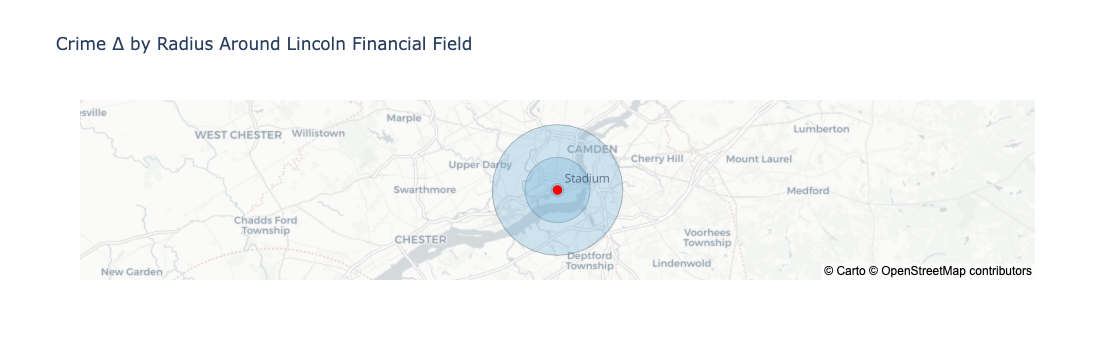

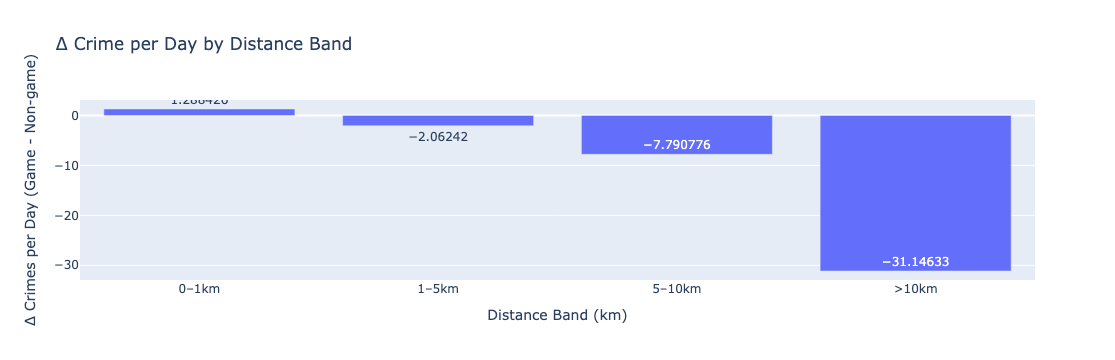

In [3]:
#Stadium coords
lincoln_field = (-75.1675, 39.9008)

#preprocess crime data
philly_processed = utils.preprocess_crime_data(philly_crime_all, stadium_coords=lincoln_field, date_col='dispatch_date_time')

#Load eagles games
eagles_games_all = utils.load_all_eagles_games()

# Filter to home games only
home_games = eagles_games_all[eagles_games_all["Location"] == "Home"]

#Make a game time indicator in crime data
philly_tagged = utils.tag_game_windows(
    df=philly_processed,
    games_df=home_games,
    team_name="Eagles",
)

#Compute Δ Crime by distance
philly_delta_by_distance = utils.compute_distance_crime_delta(
    philly_tagged,
    bins=[0,1000, 5000, 10000]
)

#plot and save
figmap,figbar=utils.plot_stadium_radii_map_with_bar_chart(
    stadium_coords=lincoln_field,
    delta_df=philly_delta_by_distance,
    radii_meters=[1000, 5000, 10000],
    title="Crime Δ by Radius Around Lincoln Financial Field",
    zoom=9,
    save_path_map="output/figures/philly_radius_map.png",
    save_path_bar="output/figures/philly_eagles_gameday_distances_bar.png"
)
figmap.show()
figbar.show()






This shows a few things:
- Overall the crime rate on eagles game days causes a decrease in crime in philly as a whole
- However close to the stadium there can be seen that there is an increase in crime rates within the kilometer around the stadium on game days
- The reason crime rate decreases so much is due to the fact that it is a sunday and crime rates in philly are much lower on sundays
- the reason the decrease size increases as we go further out is due to the increase in size that this represents